# 선형 회귀 모형 (ML 모델)

In [1]:
import numpy as np
import os

np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore")

## Linear regression using the <font color=red>Normal Equation</font>

$$y=4+3 \times x + \text{error}$$

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

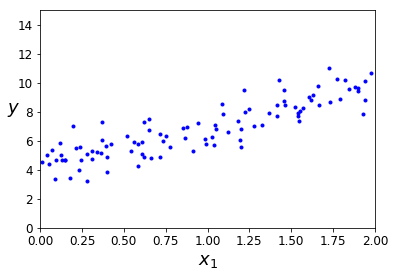

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

$$\hat{\theta}=(X^TX)^{-1}X^Ty$$

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
# 새로운 데이터를 테스트 한다.
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

[0, 2, 0, 15]

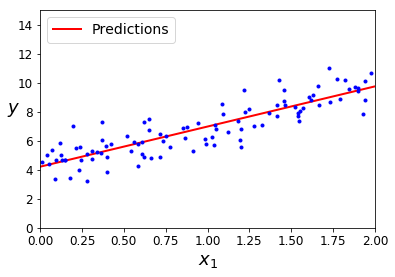

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])

In [8]:
# Normal equation을 사용하는 모듈
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# 정규방정식을 그대로 사용했을 때와 동일함을 알 수 있다.
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Linear regression using <font color=red>Batch Gradient Descent</font>

선형 회귀 모형의 비용 함수는 MSE이며, 그것의 편도함수는 다음과 같다.

$$\frac{\partial}{\partial \theta_j} \text{MSE}(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^T x^{(i)}-y^{(i)})x_j^{(i)}$$

In [11]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.21509616],
       [2.77011339]])

In [13]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            # 반복 횟수가 10번이 되기전까지만(처음 10개의 직선만) plotting
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        # Theta의 변화량을 기록할 것이다! Why? 나중에 batch, mini-batch, stochastic의 수렴도를 그림으로 그릴것이다.
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

여러 가지 학습률에 대한 경사 하강법을 그림으로 표현 (점선은 시작점)

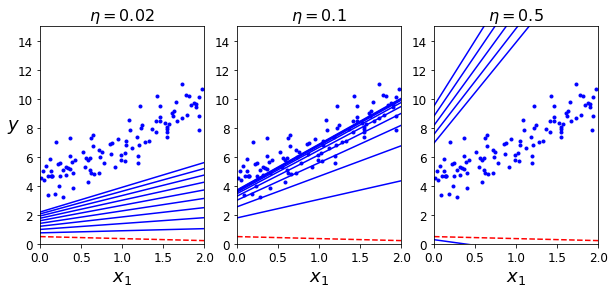

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

## Stochastic Gradient Descent

랜덤하게 데이터를 1개 선택한다. 그리고 그 데이터를 이용하여, 파라미터를 업데이트 한다.

In [16]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Randomness는 지역 최솟값에서 탈출시켜주기 때문에 좋지만 알고리즘을 전역 최소값에 다다르지 못하게 한다는 점에서는 좋지 않다. 이 딜레마를 해결하는 한 가지 방법은 학습률을 점진적으로 감소시키는 것이다. 매 반복에서 학습률을 결정하는 함수를 **학습 스케쥴(learning schedule)** 이라고 부른다.

[0, 2, 0, 15]

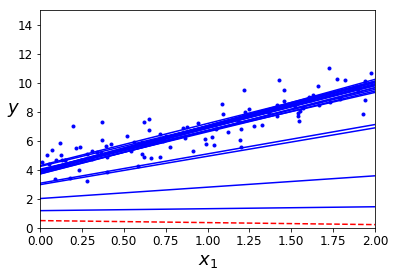

In [17]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        # 첫 번째 에포크에 대하여 처음 20개의 학습곡선만 plotting
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)  
        # 랜덤하게 1개를 선택한다.
        random_index = np.random.randint(m)    
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        # 학습률은 고정되어 있지 않고 변한다. 학습률의 초기값은 5/50, 다음값은5/51이다.
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                               

In [18]:
theta

array([[4.21076011],
       [2.74856079]])

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=-inf, verbose=0,
       warm_start=False)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16782089]), array([2.72603052]))

## Mini-batch gradient descent

In [21]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        # 미니 배치를 선택한다.
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [22]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [23]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

[2.5, 4.5, 2.3, 3.9]

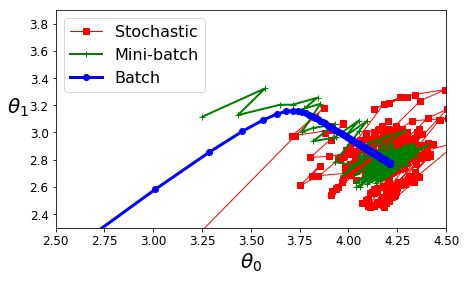

In [24]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

## Polynomial regression

In [25]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

$$y = 0.5 \times x^2 + x + 2 + \text{error}$$

In [26]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

[-3, 3, 0, 10]

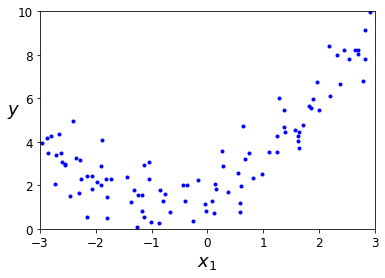

In [29]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

In [31]:
# PolynomialFeatures는 훈련 데이터를 변환한다. 훈련 세트에 있는 각 특성을 제곱한다.
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [32]:
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

[-3, 3, 0, 10]

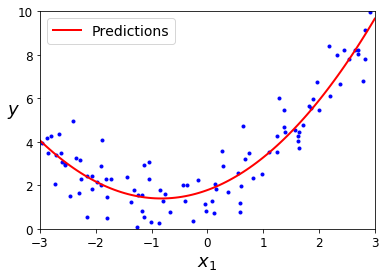

In [34]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

모델의 차원을 1, 2, 300 해서 비교해보자.

[-3, 3, 0, 10]

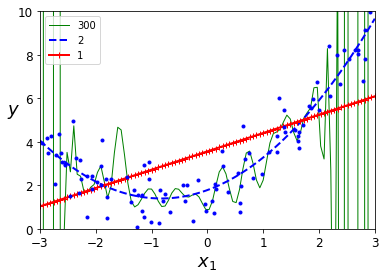

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

[0, 80, 0, 3]

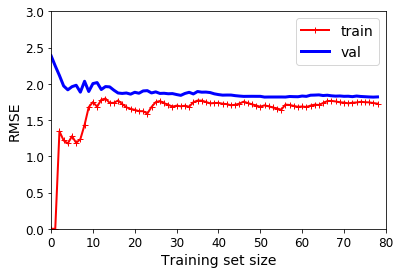

In [39]:
# 1차원 모델의 RMSE 비교
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])

[0, 80, 0, 3]

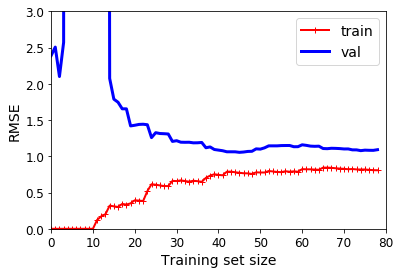

In [41]:
from sklearn.pipeline import Pipeline

# 10차원 모델의 RMSE 비교

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])

## Regularized models

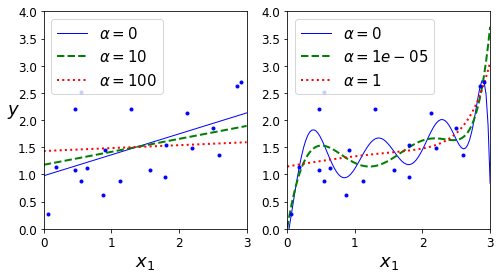

In [47]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

# Alpha가 0이면, 선형회귀와 동일하고, alpha가 커질수록 각 feature의 갸중채는 줄어든다.
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

In [48]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [49]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.49905184])

In [50]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

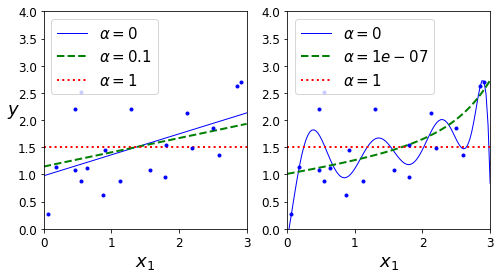

In [51]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

In [52]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [53]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early stopping
$$y=2 + x + 0.5 \times x^2 + \text{error}$$

Text(0,0.5,'RMSE')

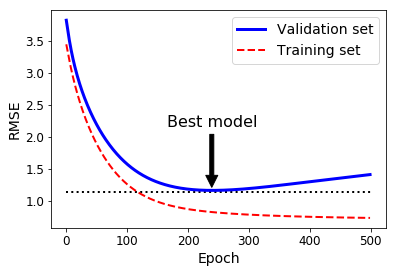

In [54]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

In [55]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [56]:
best_epoch, best_model

(239, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
        power_t=0.25, random_state=42, shuffle=True, tol=-inf, verbose=0,
        warm_start=True))

# Exercise

- 훈련 세트에 있는 특성들이 각기 아주 다른 스케일을 가지고 있습니다. 이런 데이터에 잘 작동하지 않은 알고리즘은 무엇일까요? 그 이유는 무엇일까요? 이 문제를 어떻게 해결할 수 있을까요?
    - 훈련 세트에 있는 특성의 스케일이 매우 다르면 비용 함수는 길쭉한 타원 모양의 그릇 형태가 됩니다. 그래서 **경사 하강법(SGD) 알고리즘이 수렴하는 데 오랜 시간이 걸릴 것** 입니다. 이를 해결하기 위해서는 모델을 훈련하기 전에 데이터의 스케일을 조절해야 합니다. **정규방정식은 스케일 조정 없이도 잘 작동** 합니다. 또한 **규제가 있는 모델은 특성의 스케일이 다르면 지역 최적점에 수렴할 가능성** 이 있습니다. 실제로 규제는 가중치가 커지지 못하게 제약을 가하므로 특성값이 작으면 큰 값을 가진 특성에 비해 무시되는 경향이 있습니다. 따라서 특성값들의 스케일을 조절해야합니다.

- 다항 회귀를 사용했을 때 학습 곡선을 보니 훈련 오차와 검증 오차 사이에 간격이 큽니다. 무슨 일이 생긴 걸까요? 이 문제를 해결하는 세 가지 방법은 무엇일까요?
    - 검증 오차가 훈련 오차보다 훨씬 더 높으면 **모델이 훈련 세트에 과적합** 되었기 때문일 가능성이 높습니다. 이를 해결하는 
        - 첫 번째 방법은 **다항 차수를 낮추는 것**입니다(다항회귀이기 때문에, 예를 들어 20차 회귀 방정식이었으면 10차 회귀 방정식으로 줄이는 것). 
        - 두 번째 방법은 **모델을 규제**하는 것입니다. 예를 들어 비용 함수에 $l_2$ 패널티(ridge)나 $l_1$ 패널티(lasso)를 추가합니다. 이 방법도 모델의 자유도를 감소시킵니다. 
        - 세 번째 방법은 **훈련 세트의 크기를 증가**시키는 것입니다.

- 릿지 회귀를 사용했을 때 훈련 오차와 검증 오차가 거의 비슷하고 둘 다 높았습니다. 이 모델에는 높은 편향이 문제인가요? 아니면 높은 분산이 문제인가요? 규제 하이퍼파라미터 $\alpha$를 증가시켜야 할까요? 아니면 줄여야 할까요?
    - 훈련 에러와 검증 에러가 비슷하고 둘 다 매우 높다면 모델이 훈련 세트에 과소적합(underfitting)되었을 가능성이 높습니다. 즉 bias가 높은 모델입니다. 따라서 규제 하이퍼파라미터 $\alpha$를 감소시켜야 합니다.

- 다음과 같이 사용해야 하는 이유는?
    - 평범한 선형 회귀(즉 아무런 규제가 없는 모델) 대신 릿지 회귀
        - 일반적으로 규제가 있는 모델이 없는 모델보다 성능이 좋습니다. 그래서 평범한 선형 회귀보다 릿지 회귀가 선호됩니다.
    - 릿지 회귀 대신 라쏘 회귀
        - 라쏘 회귀는 $l_1$ 페널티를 사용하여 가중치를 완전히 0으로 만드는 경향이 있습니다. 이는 가장 중요한 가중치를 제외하고는 모두 0이 되는 희소한 모델을 만듭니다. 또한 자동으로 특성 선택의 효과를 가지므로 **단지 몇 개의 특성만 실제 유용할 것이라고 의심될 때 사용**하면 좋습니다. 만약 확신이 없다면 릿지 회귀를 사용해야 합니다.
        
- 3가지 각기 다른 gradient를 무한하게 또는 충분하게 반복하면 같은 모델들을 만들어낼까요?(Global optimum에 도달할까요?)
    - 최적화할 함수가(선형 회귀나 로지스틱 회귀처럼) **볼록 함수(convex function)이고 학습률이 너무 크지 않다고 가정**하면, 모든 경사 하강법 알고리즘이 전역 최적값(global optimum)에 도달하게 되고 결국 비슷한 모델을 만들 것입니다. 하지만 학습률을 점진적으로 감소시키지 않으면 Stochastic Gradient Descent와 Mini-batch Gradient Descent는 진정한 최적점(optimum)에 도달하지 못할 것입니다. 대신 전역 최적값 주변을 이리저리 맴돌게 됩니다. 따라서 매우 오랫동안 훈련을 해도 경사 하강법 알고리즘들은 조금씩 다른 모델을 만들게 됩니다.